In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Read Data

In [320]:
# Memuat dataset
df = pd.read_csv('restaurant_menu_optimization_data.csv')

In [321]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [322]:
# Display first few rows
df.head()


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


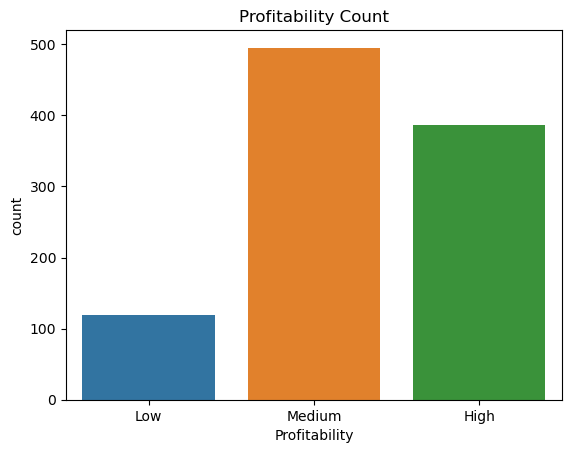

In [323]:
# Visualizations
# Countplot for Profitability
sns.countplot(data=df, x='Profitability')
plt.title('Profitability Count')
plt.show()


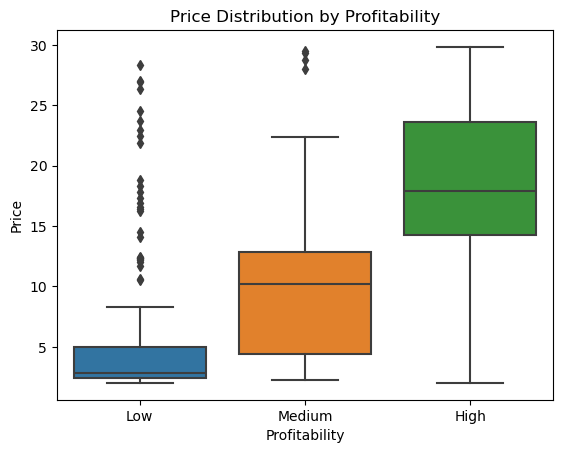

In [324]:
# Boxplot for Price
sns.boxplot(data=df, x='Profitability', y='Price')
plt.title('Price Distribution by Profitability')
plt.show()

# Stage 2: Data Preprocessing

In [325]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Definisi DataFrame dan pemilihan kolom
df_select = df[['MenuCategory', 'MenuItem','Price', 'Profitability']]

In [326]:
# Separate
train_df = df_select.iloc[:950, :]
test_df = df_select.iloc[950:,:10]

print("Train data size:", train_df.shape)
print("Test data size:", test_df.shape)

Train data size: (950, 4)
Test data size: (50, 4)


In [327]:
# Cek missing values
print("Missing values:\n", df_select.isnull().sum())

Missing values:
 MenuCategory     0
MenuItem         0
Price            0
Profitability    0
dtype: int64


In [328]:
# Pisahkan fitur (x) dan target (y)
x = train_df.drop('Profitability', axis=1)
y = train_df['Profitability']

In [329]:
# Split data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234, test_size=0.2)

In [330]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

In [331]:
# Inisialisasi ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ("cat_menu_category", OneHotEncoder(drop='first'), ['MenuCategory']),
        ("cat_menu_item", CountVectorizer(), 'MenuItem'),
        ("num_price", MinMaxScaler(), ['Price'])
    ],
    remainder='passthrough'
)

In [332]:
# Transformasi data
x_train_trans = ct.fit_transform(x_train)
x_test_trans = ct.transform(x_test)

In [333]:
# Memeriksa hasil
print(x_train_trans.shape)
print(x_test_trans.shape)

(760, 35)
(190, 35)


# Stage 3: Model Training and Comparison

# Model SVM

In [334]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Example for SVM
from sklearn.svm import SVC
svm_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', SVC())
])
svm_pipeline.fit(x_train, y_train)
y_pred_svm = svm_pipeline.predict(x_test)

In [335]:
# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Akurasi: {accuracy_svm:.4f}")
print(f"SVM - Presisi: {precision_svm:.4f}")
print(f"SVM - Recall: {recall_svm:.4f}")
print(f"SVM - Nilai F1: {f1_svm:.4f}")

SVM - Akurasi: 0.6789
SVM - Presisi: 0.6287
SVM - Recall: 0.6789
SVM - Nilai F1: 0.6529


c:\Users\indir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [336]:
# Print classification report
print("SVM - Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM - Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.69      0.66        70
         Low       0.00      0.00      0.00        14
      Medium       0.70      0.76      0.73       106

    accuracy                           0.68       190
   macro avg       0.45      0.48      0.47       190
weighted avg       0.63      0.68      0.65       190



c:\Users\indir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [337]:
# Cross-Validation example
cv_scores = cross_val_score(svm_pipeline, x_train, y_train, cv=5)
print(f"SVM Cross-Validation Score: {cv_scores.mean():.4f}")

SVM Cross-Validation Score: 0.6421


In [338]:
# Hyperparameter tuning example
param_grid = {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(f"Best Parameters for SVM: {grid_search.best_params_}")

Best Parameters for SVM: {'classifier__C': 10, 'classifier__kernel': 'linear'}


# Model Decision Tree

In [339]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [340]:
# Inisialisasi Pipeline untuk Decision Tree
dt_pipeline = Pipeline(steps=[
    ('preprocessor', ct),                 # Preprocessing dengan ColumnTransformer
    ('classifier', DecisionTreeClassifier())    # Decision Tree classifier
])
# Train Decision Tree model
dt_pipeline.fit(x_train, y_train)


# Prediksi dengan model yang sudah dilatih
y_pred_dt = dt_pipeline.predict(x_test)


In [341]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree - Akurasi: {accuracy_dt:.4f}")
print(f"Decision Tree - Presisi: {precision_dt:.4f}")
print(f"Decision Tree - Recall: {recall_dt:.4f}")
print(f"Decision Tree - Nilai F1: {f1_dt:.4f}")

Decision Tree - Akurasi: 0.8632
Decision Tree - Presisi: 0.8625
Decision Tree - Recall: 0.8632
Decision Tree - Nilai F1: 0.8624


In [342]:
# Print classification report
print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree - Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.90      0.88        70
         Low       0.54      0.50      0.52        14
      Medium       0.91      0.89      0.90       106

    accuracy                           0.86       190
   macro avg       0.77      0.76      0.76       190
weighted avg       0.86      0.86      0.86       190



# Model Random Forest

In [343]:
# Example for Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', RandomForestClassifier())
])
rf_pipeline.fit(x_train, y_train)
y_pred_rf = rf_pipeline.predict(x_test)

In [344]:
# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Akurasi: {accuracy_rf:.4f}")
print(f"Random Forest - Presisi: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - Nilai F1: {f1_rf:.4f}")

Random Forest - Akurasi: 0.8737
Random Forest - Presisi: 0.8733
Random Forest - Recall: 0.8737
Random Forest - Nilai F1: 0.8731


In [345]:
# Print classification report
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest - Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.90      0.88        70
         Low       0.54      0.50      0.52        14
      Medium       0.93      0.91      0.92       106

    accuracy                           0.87       190
   macro avg       0.77      0.77      0.77       190
weighted avg       0.87      0.87      0.87       190



In [346]:
# Cross-Validation and Hyperparameter Tuning for Random Forest
cv_scores_rf = cross_val_score(rf_pipeline, x_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Score: {cv_scores_rf.mean():.4f}")

Random Forest Cross-Validation Score: 0.8671


# Model KNN

In [347]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi Pipeline untuk KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', ct),                 # Preprocessing dengan ColumnTransformer
    ('classifier', KNeighborsClassifier())    # KNN classifier
])

# Train KNN model
knn_pipeline.fit(x_train, y_train)

# Prediksi dengan model yang sudah dilatih
y_pred_knn = knn_pipeline.predict(x_test)

In [348]:
# Evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"KNN - Akurasi: {accuracy_knn:.4f}")
print(f"KNN - Presisi: {precision_knn:.4f}")
print(f"KNN - Recall: {recall_knn:.4f}")
print(f"KNN - Nilai F1: {f1_knn:.4f}")

KNN - Akurasi: 0.8947
KNN - Presisi: 0.8992
KNN - Recall: 0.8947
KNN - Nilai F1: 0.8930


In [349]:
# Print classification report
print("KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN - Classification Report:
               precision    recall  f1-score   support

        High       0.82      0.93      0.87        70
         Low       0.89      0.57      0.70        14
      Medium       0.95      0.92      0.93       106

    accuracy                           0.89       190
   macro avg       0.89      0.81      0.83       190
weighted avg       0.90      0.89      0.89       190



In [350]:
# Cross-Validation untuk KNN
cv_scores_knn = cross_val_score(knn_pipeline, x_train, y_train, cv=5)
print(f"KNN Cross-Validation Score: {cv_scores_knn.mean():.4f}")

KNN Cross-Validation Score: 0.9026


In [351]:
# Hyperparameter tuning untuk KNN
param_grid_knn = {'classifier__n_neighbors': [3, 5, 7, 10]}
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5)
grid_search_knn.fit(x_train, y_train)
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")


Best Parameters for KNN: {'classifier__n_neighbors': 7}


# Model ANN

In [352]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi Pipeline untuk ANN
ann_pipeline = Pipeline(steps=[
    ('preprocessor', ct),  # Preprocessing dengan ColumnTransformer
    ('classifier', MLPClassifier(max_iter=500))  # ANN classifier
])

# Train ANN model
ann_pipeline.fit(x_train, y_train)

# Prediksi dengan model yang sudah dilatih
y_pred_ann = ann_pipeline.predict(x_test)

c:\Users\indir\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [353]:
# Evaluasi
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')

print(f"ANN - Akurasi: {accuracy_ann:.4f}")
print(f"ANN - Presisi: {precision_ann:.4f}")
print(f"ANN - Recall: {recall_ann:.4f}")
print(f"ANN - Nilai F1: {f1_ann:.4f}")


ANN - Akurasi: 0.8579
ANN - Presisi: 0.8672
ANN - Recall: 0.8579
ANN - Nilai F1: 0.8469


In [354]:
# Print classification report
print("ANN - Classification Report:\n", classification_report(y_test, y_pred_ann))

ANN - Classification Report:
               precision    recall  f1-score   support

        High       0.81      0.90      0.85        70
         Low       1.00      0.29      0.44        14
      Medium       0.89      0.91      0.90       106

    accuracy                           0.86       190
   macro avg       0.90      0.70      0.73       190
weighted avg       0.87      0.86      0.85       190



In [355]:
# Cross-Validation untuk ANN
cv_scores_ann = cross_val_score(ann_pipeline, x_train, y_train, cv=5)
print(f"ANN Cross-Validation Score: {cv_scores_ann.mean():.4f}")

ANN Cross-Validation Score: 0.8013


In [356]:
# Hyperparameter tuning untuk ANN
param_grid_ann = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (150,), (100, 100)],  # Contoh ukuran hidden layers
    'classifier__activation': ['relu', 'tanh'],  # Fungsi aktivasi
    'classifier__solver': ['adam', 'sgd']  # Optimizer
}
grid_search_ann = GridSearchCV(ann_pipeline, param_grid_ann, cv=5)
grid_search_ann.fit(x_train, y_train)
print(f"Best Parameters for ANN: {grid_search_ann.best_params_}")


c:\Users\indir\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Best Parameters for ANN: {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (50,), 'classifier__solver': 'adam'}


c:\Users\indir\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Logistic Regression

In [357]:
from sklearn.linear_model import LogisticRegression
# Inisialisasi Pipeline untuk Logistic Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic Regression classifier
])

# Train Logistic Regression model
lr_pipeline.fit(x_train, y_train)

# Prediksi dengan model yang sudah dilatih
y_pred_lr = lr_pipeline.predict(x_test)

In [358]:
# Hitung akurasi dan nilai F1 untuk Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Hasil
print(f"Logistic Regression Akurasi: {accuracy_lr:.4f}")
print(f"Logistic Regression Nilai F1: {f1_lr:.4f}")

Logistic Regression Akurasi: 0.8105
Logistic Regression Nilai F1: 0.7798


In [359]:
# Cross-Validation untuk Logistic Regression
cv_scores_lr = cross_val_score(lr_pipeline, x_train, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Score: {cv_scores_lr.mean():.4f}")

# Hyperparameter tuning untuk Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga']  # Solver yang digunakan
}
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5)
grid_search_lr.fit(x_train, y_train)
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")

Logistic Regression Cross-Validation Score: 0.8026


c:\Users\indir\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\indir\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


c:\Users\indir\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Membandingkan Kinerja Model

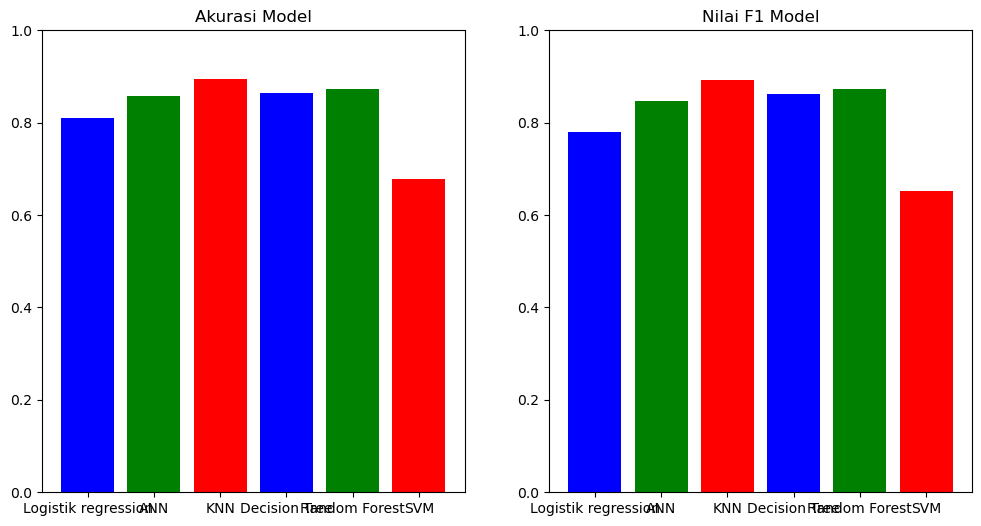

In [360]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
models = ['Logistik regression','ANN','KNN','Decision Tree', 'Random Forest', 'SVM']
accuracies = [accuracy_lr,accuracy_ann,accuracy_knn, accuracy_dt, accuracy_rf, accuracy_svm]
f1_scores = [f1_lr, f1_ann, f1_knn, f1_dt, f1_rf, f1_svm]

# Visualisasi Akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Akurasi Model')
plt.ylim([0, 1])

# Visualisasi Nilai F1
plt.subplot(1, 2, 2)
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.title('Nilai F1 Model')
plt.ylim([0, 1])

plt.show()
